In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

from lawson_quant_library.analytics.vol_surface import build_surface_points
from lawson_quant_library.viz.vol_surface import plot_surface_points_3d

In [8]:
as_of = pd.Timestamp.utcnow().tz_localize(None)
as_of

Timestamp('2026-01-31 20:54:04.595619')

In [9]:
benchmarks = {'SPX': 'SPY', 'NASDAQ': 'QQQ', 'Russel 2000': 'IWM', 'MSCI World': 'URTH', 'GOLD': 'GLD'}

In [10]:
surfaces = {}

for name, ticker in benchmarks.items():
    df = build_surface_points(ticker, as_of=as_of, option_type='call', n_expiries=50, n_atm=30,)
    print(name, ticker, df.shape)
    surfaces[name] = df

SPX SPY (1013, 5)
NASDAQ QQQ (951, 5)
Russel 2000 IWM (849, 5)
MSCI World URTH (15, 5)
GOLD GLD (840, 5)


In [11]:
surfaces['SPX'].head()
surfaces['SPX'][['ttm', 'moneyness', 'iv']].describe()

,ttm,moneyness,iv
count,1013.000000,1013.000000,1013.000000
mean,0.554686,0.999075,0.140117
std,0.735516,0.037240,0.017143
min,0.003091,0.895993,0.075085
25%,0.030470,0.984147,0.131331
50%,0.241284,0.998598,0.142315
75%,0.876466,1.014495,0.151057
max,2.869621,1.105539,0.188642


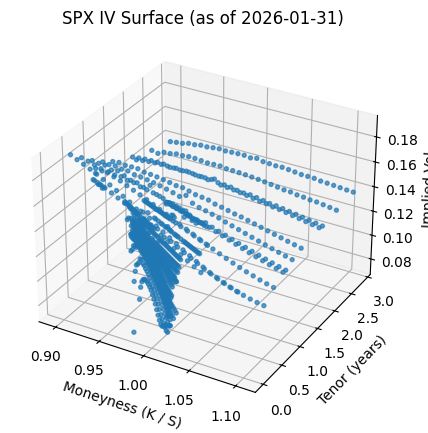

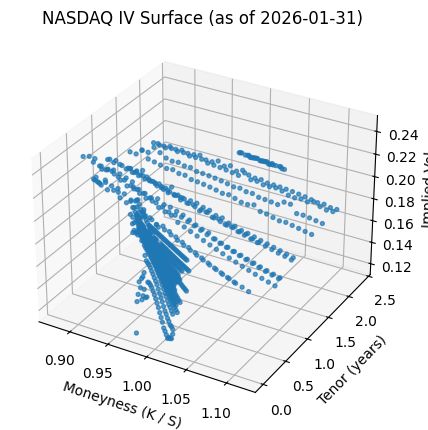

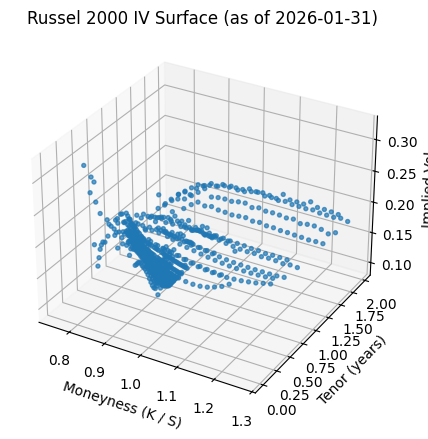

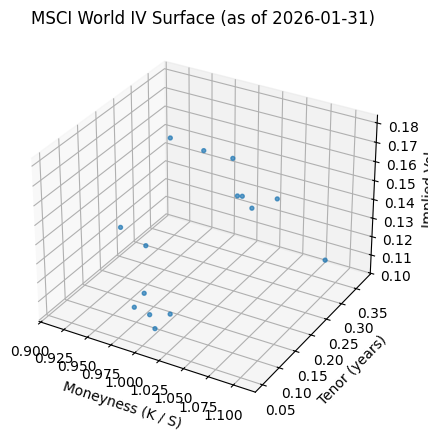

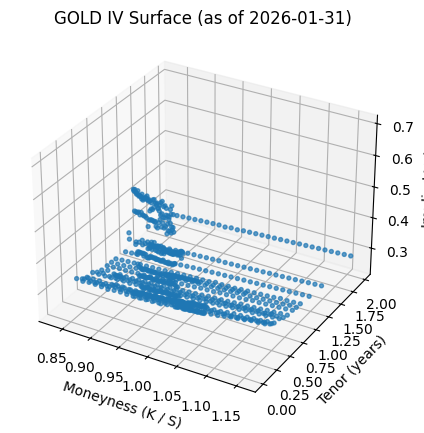

In [12]:
for name, df in surfaces.items():
    if df.empty:
        print("EMPTY:", name)
        continue
    plot_surface_points_3d(df, title=f"{name} IV Surface (as of {as_of.date()})")
    plt.show()